In [ ]:
#Importing Liabraries
import pandas as pd
import pylab as pl
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt

%matplotlib inline


#ML Liabraries
import itertools
import random
import scipy
import pylab


In [ ]:
# Data Loading preprocessing
df = pd.read_csv('Vehicle_Emissions_Data.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199.0,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256.0,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232.0,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242.0,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230.0,7


In [ ]:
df.size


11220

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             906 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           917 non-null    float6

In [ ]:
df.isnull().sum() #for number of null values

Model_Year                                 0
Make                                       0
Model                                      0
Vehicle_Class                              0
Engine_Size                               29
Cylinders                                  0
Transmission                               0
Fuel_Consumption_in_City(L/100 km)         0
Fuel_Consumption_in_City_Hwy(L/100 km)     0
Fuel_Consumption_comb(L/100km)             0
CO2_Emissions                             18
Smog_Level                                 0
dtype: int64

In [ ]:
# there are missing values present in dataset, so replacing the missing values by mean
engine_size_mean = df['Engine_Size'].mean()
co2_emissions_mean = df['CO2_Emissions'].mean()

# Replace missing values with the mean
df['Engine_Size'].fillna(engine_size_mean, inplace=True)
df['CO2_Emissions'].fillna(co2_emissions_mean, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    float6

In [ ]:
# Obtain metadata of given dataset

df.describe()


,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.204967,5.716578,12.498610,9.306203,11.060214,258.533261,4.726203
std,0.0,1.360496,1.977359,3.487271,2.215819,2.867028,64.274190,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,256.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.000000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [ ]:

print(df.head())


# Variable Creation
# Creating a new variable 'Engine_Size_Category' based on 'Engine_Size'
def categorize_engine_size(engine_size):
    if engine_size < 2.0:
        return 'Small'
    elif 2.0 <= engine_size < 3.0:
        return 'Medium'
    else:
        return 'Large'

df['Engine_Size_Category'] = df['Engine_Size'].apply(categorize_engine_size)

# Display the head of the transformed and created dataset
print("\nHead of the dataset after transformation and creation:")
print(df.head())


   Model_Year   Make              Model Vehicle_Class  Engine_Size  Cylinders  \
0        2021  Acura                ILX       Compact          2.4          4   
1        2021  Acura                NSX    Two-seater          3.5          6   
2        2021  Acura         RDX SH-AWD    SUV: Small          2.0          4   
3        2021  Acura  RDX SH-AWD A-SPEC    SUV: Small          2.0          4   
4        2021  Acura         TLX SH-AWD       Compact          2.0          4   

  Transmission  Fuel_Consumption_in_City(L/100 km)  \
0          AM8                                 9.9   
1          AM9                                11.1   
2         AS10                                11.0   
3         AS10                                11.3   
4         AS10                                11.2   

   Fuel_Consumption_in_City_Hwy(L/100 km)  Fuel_Consumption_comb(L/100km)  \
0                                     7.0                             8.6   
1                                 

In [ ]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                                        Model_Year  Engine_Size  Cylinders  \
Model_Year                                     NaN          NaN        NaN   
Engine_Size                                    NaN     1.000000   0.892511   
Cylinders                                      NaN     0.892511   1.000000   
Fuel_Consumption_in_City(L/100 km)             NaN     0.816876   0.842551   
Fuel_Consumption_in_City_Hwy(L/100 km)         NaN     0.733329   0.742968   
Fuel_Consumption_comb(L/100km)                 NaN     0.801246   0.821770   
CO2_Emissions                                  NaN     0.808310   0.831142   
Smog_Level                                     NaN    -0.498796  -0.532742   

                                        Fuel_Consumption_in_City(L/100 km)  \
Model_Year                                                             NaN   
Engine_Size                                                       0.816876   
Cylinders                                 

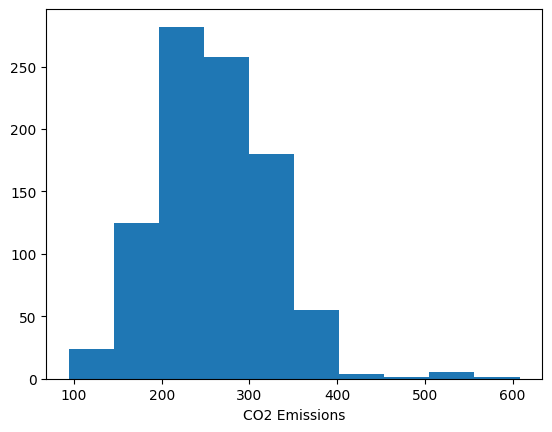

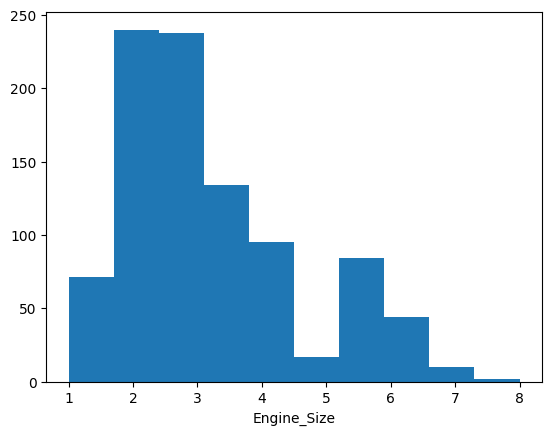

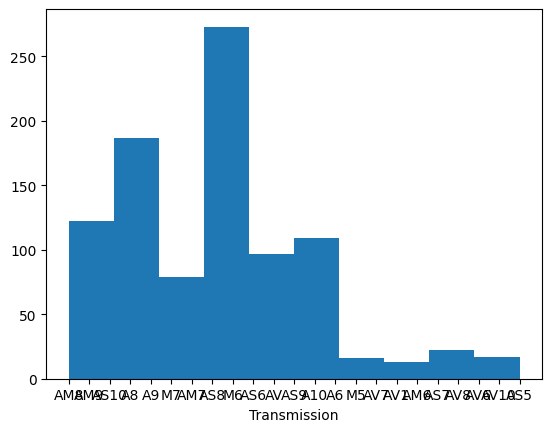

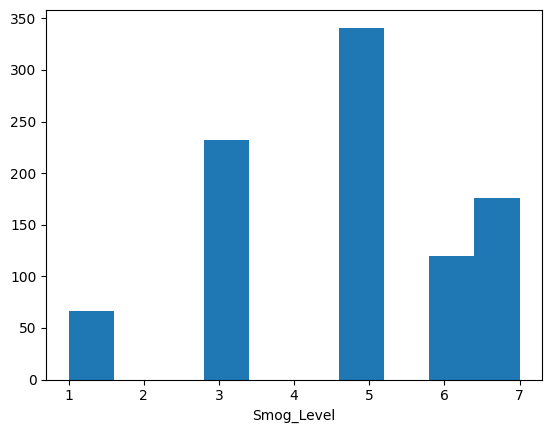

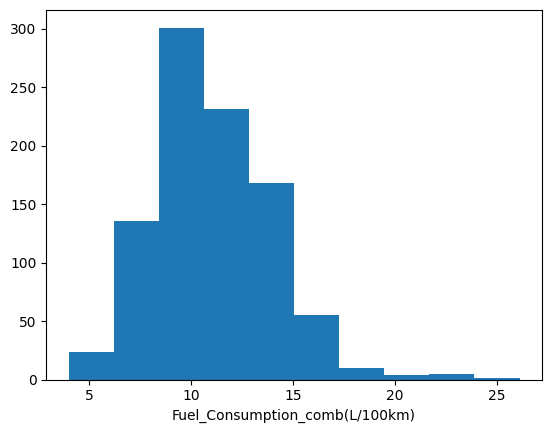

In [ ]:
#histogram of CO2 emissions.
plt.hist(df['CO2_Emissions'])
plt.xlabel('CO2 Emissions')
plt.show()

plt.hist(df['Engine_Size'])
plt.xlabel('Engine_Size')
plt.show()
plt.hist(df['Transmission'])
plt.xlabel('Transmission')
plt.show()
plt.hist(df['Smog_Level'])
plt.xlabel('Smog_Level')
plt.show()
plt.hist(df['Fuel_Consumption_comb(L/100km)'])
plt.xlabel('Fuel_Consumption_comb(L/100km)')
plt.show()


In [ ]:
df.iloc[28]

Model_Year                                                      2021
Make                                                            Audi
Model                                     A8 L Sedan 55 TFSI quattro
Vehicle_Class                                              Full-size
Engine_Size                                                      3.0
Cylinders                                                          6
Transmission                                                     AS8
Fuel_Consumption_in_City(L/100 km)                              13.5
Fuel_Consumption_in_City_Hwy(L/100 km)                           8.9
Fuel_Consumption_comb(L/100km)                                  11.5
CO2_Emissions                                                  267.0
Smog_Level                                                         5
Engine_Size_Category                                           Large
Name: 28, dtype: object

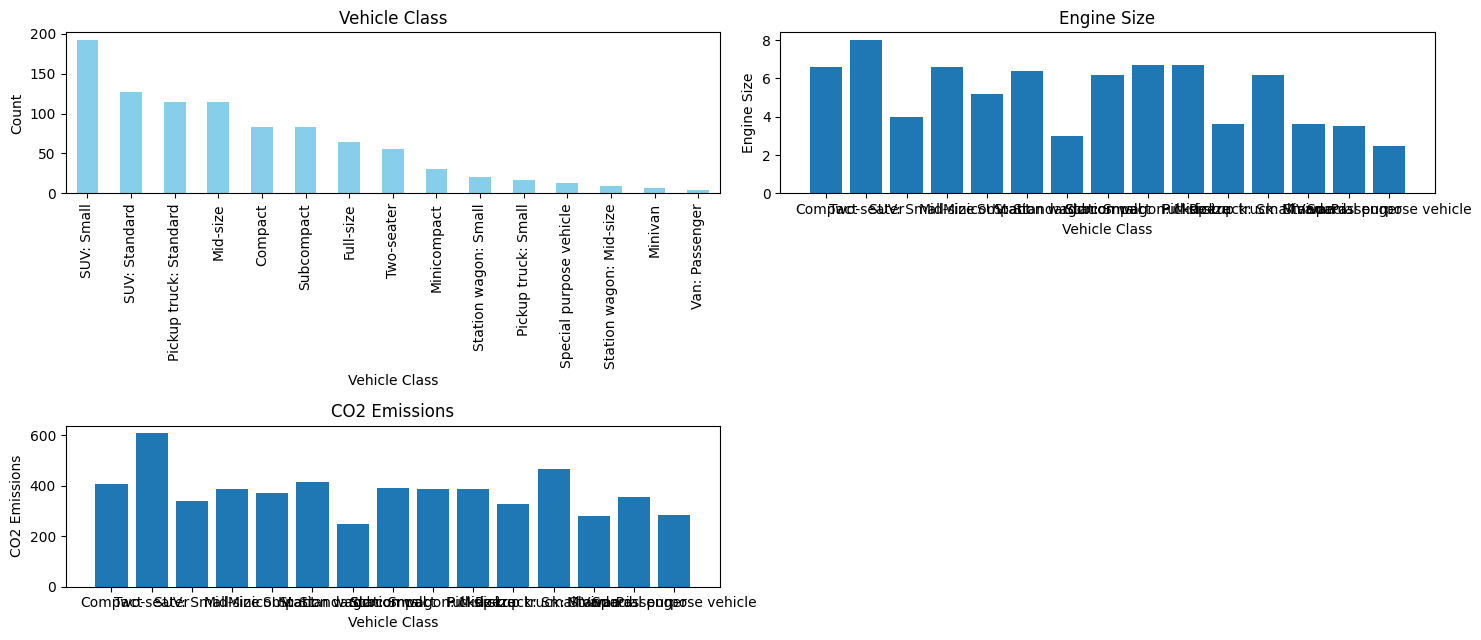

In [ ]:
import matplotlib.pyplot as plt



# Set up the figure and subplots
plt.figure(figsize=(15, 10))

# Plot for Categorical Feature (Vehicle_Class)
plt.subplot(3, 2, 1)
df['Vehicle_Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Count")

# Plot for Numeric Feature 1 (Engine_Size)
plt.subplot(3, 2, 2)
plt.bar(df["Vehicle_Class"], df["Engine_Size"])
plt.title("Engine Size")
plt.xlabel("Vehicle Class")
plt.ylabel("Engine Size")

# Plot for Numeric Feature 2 (CO2_Emissions)
plt.subplot(3, 2, 3)
plt.bar(df["Vehicle_Class"], df["CO2_Emissions"])
plt.title("CO2 Emissions")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Engine_Size_Category
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199.0,3,Medium
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256.0,3,Large
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232.0,6,Medium
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242.0,6,Medium
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230.0,7,Medium


In [ ]:
x = ["Engine_Size", "Cylinders", "Fuel_Consumption_comb(L/100km)", "Smog_Level"]
df1= df
for i in x:
  df1[i] = df[i]/np.abs(df1[i].max())
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Engine_Size_Category
0,2021,Acura,ILX,Compact,0.3000,0.250,AM8,9.9,7.0,0.329502,199.0,0.428571,Medium
1,2021,Acura,NSX,Two-seater,0.4375,0.375,AM9,11.1,10.8,0.421456,256.0,0.428571,Large
2,2021,Acura,RDX SH-AWD,SUV: Small,0.2500,0.250,AS10,11.0,8.6,0.379310,232.0,0.857143,Medium
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.2500,0.250,AS10,11.3,9.1,0.394636,242.0,0.857143,Medium
4,2021,Acura,TLX SH-AWD,Compact,0.2500,0.250,AS10,11.2,8.0,0.375479,230.0,1.000000,Medium


Text(0.5, 0, 'CO2_Emissions')

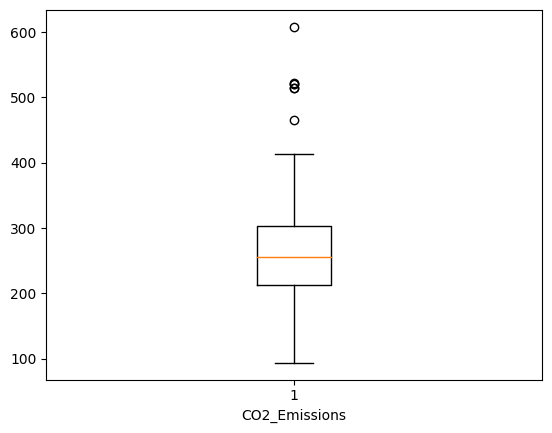

In [ ]:
#find outlier for  numeric attributes
plt.boxplot(df1["CO2_Emissions"]);
plt.xlabel("CO2_Emissions")

In [ ]:
#detect outlier from CO2_Emissions & replace mean value
q=list(df1["CO2_Emissions"].quantile([0,0.25,0.5,0.75,1]))
q

[94.0, 213.0, 256.0, 303.0, 608.0]

In [ ]:
IQR=q[3] - q[1]
IQR

90.0

In [ ]:
LIF =q[1] - (1.5*IQR)
LOF =q[1] - (3*IQR)
UIF =q[3] + (1.5*IQR)
UOF =q[3] + (3*IQR)

In [ ]:
upper_outlier = list(df1[df1["CO2_Emissions"]>UIF].index)
print(upper_outlier)

[123, 124, 548, 549, 550, 551, 825]


In [ ]:
x=df1
x_mean=df1["CO2_Emissions"].mean()
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Engine_Size_Category
0,2021,Acura,ILX,Compact,0.3000,0.250,AM8,9.9,7.0,0.329502,199.0,0.428571,Medium
1,2021,Acura,NSX,Two-seater,0.4375,0.375,AM9,11.1,10.8,0.421456,256.0,0.428571,Large
2,2021,Acura,RDX SH-AWD,SUV: Small,0.2500,0.250,AS10,11.0,8.6,0.379310,232.0,0.857143,Medium
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.2500,0.250,AS10,11.3,9.1,0.394636,242.0,0.857143,Medium
4,2021,Acura,TLX SH-AWD,Compact,0.2500,0.250,AS10,11.2,8.0,0.375479,230.0,1.000000,Medium


In [ ]:
x.iloc[upper_outlier,10]=x_mean

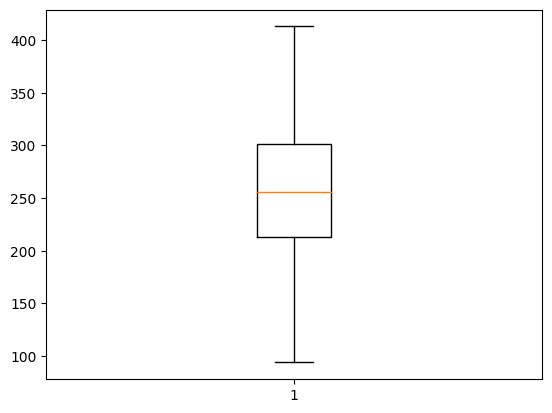

In [ ]:
plt.boxplot(df1["CO2_Emissions"]);

# LAB 5


In [ ]:
test = df1
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    float64
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    float6

**Lab 6**

In [ ]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Engine_Size_Category
0,2021,Acura,ILX,Compact,0.3000,0.250,AM8,9.9,7.0,0.329502,199.0,0.428571,Medium
1,2021,Acura,NSX,Two-seater,0.4375,0.375,AM9,11.1,10.8,0.421456,256.0,0.428571,Large
2,2021,Acura,RDX SH-AWD,SUV: Small,0.2500,0.250,AS10,11.0,8.6,0.379310,232.0,0.857143,Medium
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.2500,0.250,AS10,11.3,9.1,0.394636,242.0,0.857143,Medium
4,2021,Acura,TLX SH-AWD,Compact,0.2500,0.250,AS10,11.2,8.0,0.375479,230.0,1.000000,Medium


In [ ]:
#create train data and test data for development of model

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['CO2_Emissions']], df['Engine_Size'], random_state=0)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (701, 1)
X_test shape: (234, 1)
Y_train shape: (701,)
Y_test shape: (234,)


In [ ]:
#linear regression model to predict the Engine_size

from sklearn import linear_model as lm

In [ ]:
#imported linear model package

Lin_model = lm.LinearRegression()

X_train = np.asanyarray(X_train[['CO2_Emissions']])
Y_train = np.asanyarray(Y_train)

#find optimized relationship between variables
Lin_model.fit (X_train, Y_train)

# the coefficient method
print('coefficients: ', Lin_model.coef_)
print('Intercept: ', Lin_model.intercept_)

coefficients:  [0.00222915]
Intercept:  -0.17034115066912653


In [ ]:
#finding predicted price by power
predicted_Engine_Size = Lin_model.predict(X_train)


In [ ]:
print("MSE: ", np.mean(np.square(predicted_Engine_Size-Y_train)))

MSE:  0.011624904086818646


In [ ]:
def signmoidal(z):
    return (1/(1+np.exp(-z)))

In [ ]:
# z = w0 + w1x
logistic_predicted = signmoidal(predicted_Engine_Size)
logistic_predicted

array([0.60250776, 0.6030415 , 0.57335458, 0.63715772, 0.59232165,
       0.56296329, 0.5728092 , 0.61366333, 0.57988489, 0.65146049,
       0.63147001, 0.63457705, 0.57988489, 0.59822914, 0.63405998,
       0.53537573, 0.58962746, 0.58042785, 0.57988489, 0.55966987,
       0.65044751, 0.64994051, 0.61419169, 0.6309511 , 0.59715712,
       0.60012071, 0.64229532, 0.65951453, 0.57444481, 0.59232165,
       0.63509381, 0.59124463, 0.57226364, 0.57607879, 0.59285982,
       0.55361846, 0.57389978, 0.65146049, 0.571172  , 0.55637118,
       0.62208411, 0.59178325, 0.58205557, 0.58854827, 0.58800836,
       0.57335458, 0.58422309, 0.65499512, 0.61207667, 0.58854827,
       0.59662076, 0.65700727, 0.60250776, 0.57879838, 0.64689141,
       0.65499512, 0.56296329, 0.64229532, 0.61577513, 0.60012071,
       0.57771111, 0.60995742, 0.59554734, 0.51926407, 0.62313167,
       0.60677076, 0.58908798, 0.57062591, 0.59447301, 0.60995742,
       0.59016674, 0.6163024 , 0.62991237, 0.61260582, 0.56843

In [ ]:
type(logistic_predicted)
logistic_predicted.shape

(701,)

In [ ]:
df1 = pd.DataFrame(logistic_predicted, columns=["logistic_predicted"])
df1.head()

,logistic_predicted
0,0.602508
1,0.603042
2,0.573355
3,0.637158
4,0.592322


In [ ]:
def fun(p):
    if(p<0.5):
        return 0
    else:
        return 1

In [ ]:
#multiple regression / multiple input features

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['CO2_Emissions',"Fuel_Consumption_comb(L/100km)", "Smog_Level"]], df['Engine_Size'], random_state=0)



In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (701, 3)
X_test shape: (234, 3)
Y_train shape: (701,)
Y_test shape: (234,)


In [ ]:
from sklearn import linear_model as lm

Lin_model = lm.LinearRegression()

In [ ]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Engine_Size_Category
0,2021,Acura,ILX,Compact,0.3000,0.250,AM8,9.9,7.0,0.329502,199.0,0.428571,Medium
1,2021,Acura,NSX,Two-seater,0.4375,0.375,AM9,11.1,10.8,0.421456,256.0,0.428571,Large
2,2021,Acura,RDX SH-AWD,SUV: Small,0.2500,0.250,AS10,11.0,8.6,0.379310,232.0,0.857143,Medium
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.2500,0.250,AS10,11.3,9.1,0.394636,242.0,0.857143,Medium
4,2021,Acura,TLX SH-AWD,Compact,0.2500,0.250,AS10,11.2,8.0,0.375479,230.0,1.000000,Medium


In [ ]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
Xtrain = np.asanyarray(X_train)
Ytrain = np.asanyarray(Y_train)
model.fit(Xtrain, Ytrain)
Yhat = model.predict(Xtrain)

print(Yhat.shape)


(701,)


# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df'

# Select features and target variable
X = df[['Model_Year', 'Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)',
        'Fuel_Consumption_in_City_Hwy(L/100 km)', 'Fuel_Consumption_comb(L/100km)',
        'CO2_Emissions', 'Smog_Level']]
y = df['Engine_Size_Category']  # Assuming 'Engine_Size_Category' is the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predictions on training set
train_predictions = logistic_model.predict(X_train)

# Predictions on test set
test_predictions = logistic_model.predict(X_test)

# Model evaluation
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.8542780748663101
Test Accuracy: 0.8502673796791443

Classification Report:
              precision    recall  f1-score   support

       Large       0.93      0.93      0.93        92
      Medium       0.81      0.85      0.83        81
       Small       0.40      0.29      0.33        14

    accuracy                           0.85       187
   macro avg       0.72      0.69      0.70       187
weighted avg       0.84      0.85      0.84       187



**Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.8449197860962567

Classification Report:
              precision    recall  f1-score   support

       Large       0.93      0.91      0.92        92
      Medium       0.80      0.86      0.83        81
       Small       0.44      0.29      0.35        14

    accuracy                           0.84       187
   macro avg       0.72      0.69      0.70       187
weighted avg       0.84      0.84      0.84       187

